In [2]:
!pip install tensorflow numpy matplotlib scikit-learn keras

Epoch 1/10
375/375 [==============================] - 42s 108ms/step - loss: 0.5876 - accuracy: 0.7880 - val_loss: 0.4484 - val_accuracy: 0.8347
Epoch 2/10
375/375 [==============================] - 39s 103ms/step - loss: 0.3805 - accuracy: 0.8633 - val_loss: 0.3474 - val_accuracy: 0.8772
Epoch 3/10
375/375 [==============================] - 39s 104ms/step - loss: 0.3279 - accuracy: 0.8808 - val_loss: 0.3243 - val_accuracy: 0.8829
Epoch 4/10
375/375 [==============================] - 37s 100ms/step - loss: 0.2930 - accuracy: 0.8927 - val_loss: 0.2952 - val_accuracy: 0.8932
Epoch 5/10
375/375 [==============================] - 37s 98ms/step - loss: 0.2685 - accuracy: 0.9013 - val_loss: 0.2920 - val_accuracy: 0.8942
Epoch 6/10
375/375 [==============================] - 37s 98ms/step - loss: 0.2476 - accuracy: 0.9101 - val_loss: 0.2667 - val_accuracy: 0.9003
Epoch 7/10
375/375 [==============================] - 36s 96ms/step - loss: 0.2294 - accuracy: 0.9175 - val_loss: 0.2708 - val_accur

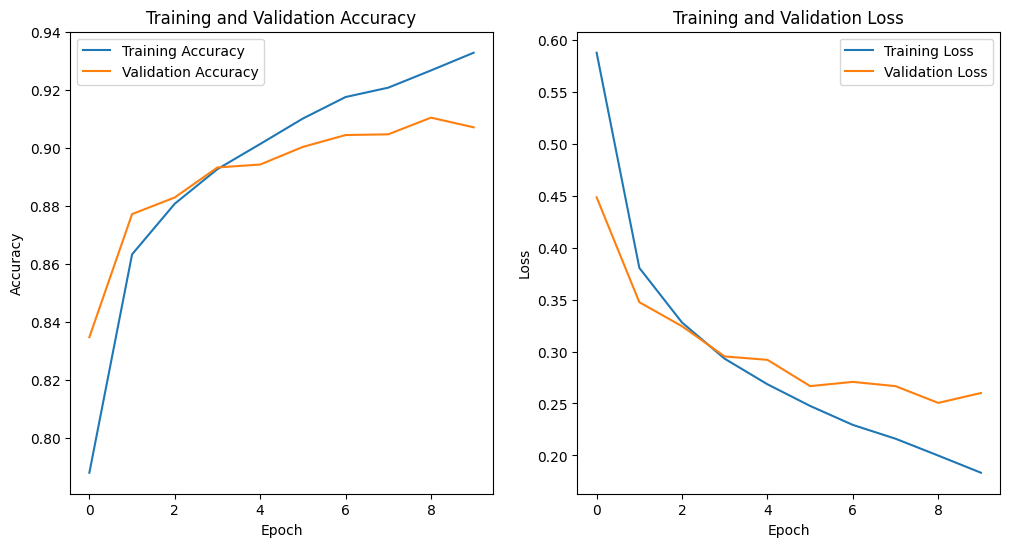

Epoch 1/10
375/375 [==============================] - 38s 100ms/step - loss: 0.5826 - accuracy: 0.7926 - val_loss: 0.4184 - val_accuracy: 0.8473
Epoch 2/10
375/375 [==============================] - 37s 99ms/step - loss: 0.3689 - accuracy: 0.8666 - val_loss: 0.3398 - val_accuracy: 0.8807
Epoch 3/10
375/375 [==============================] - 37s 98ms/step - loss: 0.3180 - accuracy: 0.8849 - val_loss: 0.3118 - val_accuracy: 0.8854
Epoch 4/10
375/375 [==============================] - 36s 97ms/step - loss: 0.2889 - accuracy: 0.8940 - val_loss: 0.3039 - val_accuracy: 0.8886
Epoch 5/10
375/375 [==============================] - 36s 97ms/step - loss: 0.2626 - accuracy: 0.9037 - val_loss: 0.2781 - val_accuracy: 0.8991
Epoch 6/10
375/375 [==============================] - 41s 110ms/step - loss: 0.2435 - accuracy: 0.9123 - val_loss: 0.2688 - val_accuracy: 0.9011
Epoch 7/10
375/375 [==============================] - 38s 102ms/step - loss: 0.2231 - accuracy: 0.9196 - val_loss: 0.2845 - val_accura

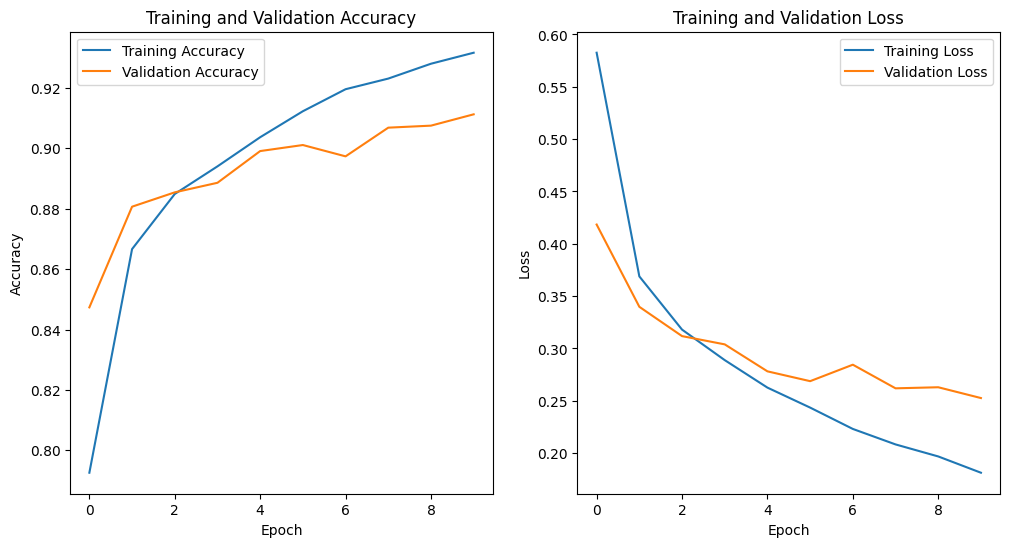

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Завантаження даних
(x_train, y_train), (dnn_x_test, dnn_y_test) = fashion_mnist.load_data()

# Перетворення даних
x_train = tf.cast(x_train[..., tf.newaxis], tf.float32) / 255.0
dnn_x_test = tf.cast(dnn_x_test[..., tf.newaxis], tf.float32) / 255.0

# Визначення архітектури моделі
model_dnn = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_dnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Навчання
history = model_dnn.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

# Оцінка
dnn_test_loss, dnn_test_acc = model_dnn.evaluate(dnn_x_test, dnn_y_test)
print(f'Test accuracy: {dnn_test_acc}')

# Візуалізація кривих навчання
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Epoch 1/30
375/375 [==============================] - 18s 44ms/step - loss: 0.6507 - accuracy: 0.7661 - val_loss: 0.4195 - val_accuracy: 0.8430
Epoch 2/30
375/375 [==============================] - 15s 39ms/step - loss: 0.4561 - accuracy: 0.8349 - val_loss: 0.3933 - val_accuracy: 0.8561
Epoch 3/30
375/375 [==============================] - 15s 39ms/step - loss: 0.4203 - accuracy: 0.8481 - val_loss: 0.3907 - val_accuracy: 0.8549
Epoch 4/30
375/375 [==============================] - 14s 38ms/step - loss: 0.3992 - accuracy: 0.8552 - val_loss: 0.3672 - val_accuracy: 0.8660
Epoch 5/30
375/375 [==============================] - 14s 38ms/step - loss: 0.3842 - accuracy: 0.8615 - val_loss: 0.3593 - val_accuracy: 0.8729
Epoch 6/30
375/375 [==============================] - 14s 37ms/step - loss: 0.3662 - accuracy: 0.8656 - val_loss: 0.3411 - val_accuracy: 0.8777
Epoch 7/30
375/375 [==============================] - 16s 43ms/step - loss: 0.3529 - accuracy: 0.8703 - val_loss: 0.3382 - val_accuracy:

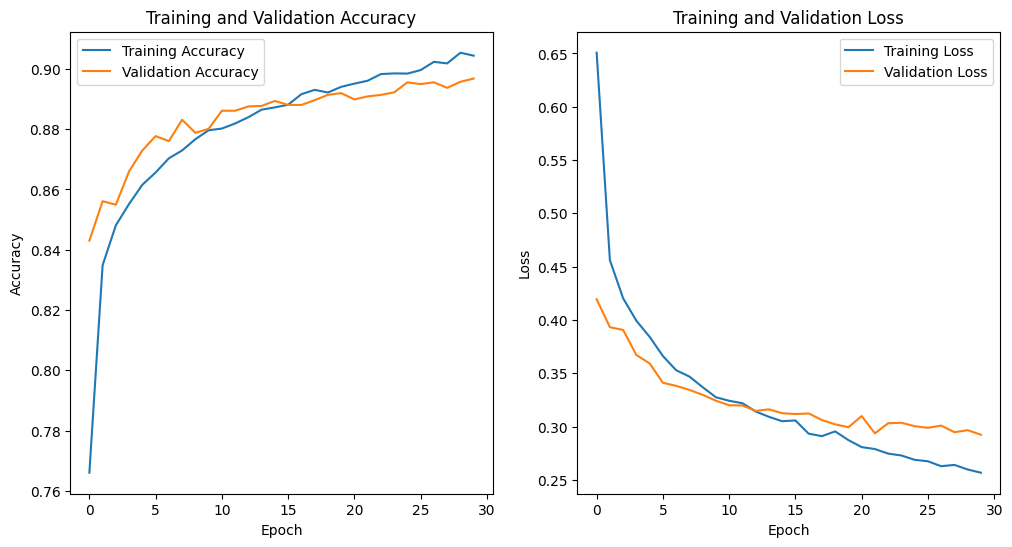

In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Завантаження даних
(x_train, y_train), (vgg16_x_test, vgg16_y_test) = fashion_mnist.load_data()

# Перетворення даних
x_train = x_train.astype("float32") / 255.0
vgg16_x_test = vgg16_x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
vgg16_y_test = keras.utils.to_categorical(vgg16_y_test, 10)

# Визначення архітектури моделі
model_vgg16 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])

model_vgg16.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Навчання
history = model_vgg16.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2, verbose=1)

# Оцінка
vgg16_test_loss, vgg16_test_acc = model_vgg16.evaluate(vgg16_x_test, vgg16_y_test)
print(f"Test accuracy (Dense layers): {vgg16_test_acc}")

# Візуалізація кривих навчання
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [6]:
# Точність моделі з використанням VGG16
vgg16_test_loss, vgg16_test_acc = model_vgg16.evaluate(vgg16_x_test, vgg16_y_test, verbose=0)

# Отримання точності багатошарової моделі
dnn_test_loss, dnn_test_acc = model_dnn.evaluate(dnn_x_test, dnn_y_test, verbose=0)

# Р-ти порівняння
print("Точність моделі з використанням VGG16 на тестових даних:", vgg16_test_acc)
print("Точність багатошарової моделі на тестових даних:", dnn_test_acc)

if vgg16_test_acc > dnn_test_acc:
    print("Модель з використанням VGG16 показала лучший результат.")
elif vgg16_test_acc < dnn_test_acc:
    print("Багатошарова модель показала кращий результат.")
else:
    print("Точність моделей співпадає.")

Точність моделі з використанням VGG16 на тестових даних: 0.8883000016212463
Точність багатошарової моделі на тестових даних: 0.9053999781608582
Багатошарова модель показала кращий результат.
